In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("../incl/")

# import ELPH_utils
# import codimar

import narrom

In [3]:
trajectories = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

# trajectories = trajectories[:100:1]

for k in range(len(trajectories)):
    trajectories[k] = trajectories[k].T

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 200


In [4]:
optimizer = narrom.optimizer.ridge(alpha=10.**-3.5)
scaler = narrom.scaler.normalize_scaler(0.1)
dim_reducer = narrom.dim_reducer.SVD()
VAR_transformer = narrom.transformer.polynomial_features(order=2)

model = narrom.narrom(trajectories, VAR_l=2, intercept=True, full_hist=False, optimizer=optimizer, scaler=scaler, dim_reducer=dim_reducer, VAR_transformer=VAR_transformer)

train_kwargs = {'rdim':20, 'prdim':20}

scores = narrom.utils.get_KFold_CV_scores(model, trajectories, folds=10, seed=817, norms=['NF','max'], train_kwargs=train_kwargs)

print('std error: ', str(np.mean(scores[0])) + '+-' + str(np.std(scores[0])) )
print('max error: ', str(np.mean(scores[1])) + '+-' + str(np.std(scores[1])) )

std error:  0.006301407495053643+-0.00393118079468427
max error:  0.03138361624470426+-0.022604387936276796


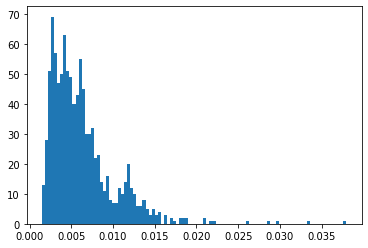

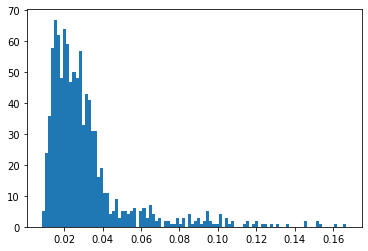

In [5]:
all_scores_std = scores[0]
all_scores_max = scores[1]

plt.hist(all_scores_std, bins=100)
plt.show()

plt.hist(all_scores_max, bins=100)
plt.show()

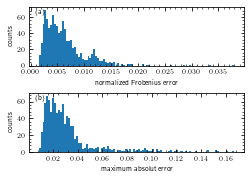

In [6]:
####################################################
####################################################
####################################################

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,2.5))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=[1], height_ratios=[1,1])




####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

plt.hist(all_scores_std, bins=100)

plt.xlabel(r'normalized Frobenius error')
plt.ylabel(r'counts')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.001))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(4))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])

plt.hist(all_scores_max, bins=100)

plt.xlabel(r'maximum absolut error')
plt.ylabel(r'counts')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.008))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(4))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################



plt.tight_layout()

plt.savefig('/home/agluedge/Preprints/ELPH/figs/pred_error_statistics.pdf')
plt.show()